# Handwritten Digit Classification


For this Hands-on, we will use the popular scikit-learn library to build a basic classifier. The MNIST dataset contains images of handwritten digits, and the task is to classify each image into its corresponding digit (0 to 9).

## Import Libraries

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## Load the Dataset

**Question 1:** Load the train and test subsets of the mnist dataset from Keras

In [2]:
import tensorflow as tf

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()



11490434/11490434 [==============================] - 0s 0us/step


## Data Pre-Processing

**Question 2:**  

*   Adjust the input shape to match the one the model is expecting
*   Normalize the values of the pixels
*   Turn labels into categories using the to_categorical function

In [3]:
# Preprocess the data
'''
-1= automatically adjusts the dimension based on other dimensions and data size
28= denotes the height and width of each image in pixels
1= represents the grayscale intensity for each pixel
'''
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0 # Reshape and normalize
X_text = X_test.reshape(-1, 28, 28, 1) / 255.0 # divide the result by 255.0 to scale it between 0 and 1

X_train, X_test = np.array(X_train), np.array(X_test) # Convert data to array

y_train = to_categorical(y_train, num_classes= 10) # converts labels into a binary matrix representation "one-hot encoding" to prepare them for classification tasks
y_test = to_categorical(y_test, num_classes= 10)

## Build and train a CNN

**Question 3:** Create a Convolutional neural Network of your choice and be carefyl while you select the following:


*   input shape
*   activation function at the output layer
*   number of output neurons



In [8]:

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



# Build the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape= (28, 28, 1))) # 32 filters, each with a 3x3 kernel size, and input shape of (28, 28, 1) for grayscale images
model.add(MaxPooling2D((2, 2))) # Add a max pooling layer to downsample the feature maps

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten()) # Flatten the output from the convolutional layers into a 1D vector

model.add(Dense(128, activation='relu')) # Add a fully connected layer with 128 neurons
model.add(Dense(10, activation='softmax')) # Output layer with 10 neurons (for 10 classes) and softmax activation for classification tasks


**Question 4:** Compile and train the model. Choose an appropriate loss function, optimizer, and print out the accuracy of the model.

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size= 128, epochs= 10, validation_split= 0.2)


Epoch 1/10
375/375 [==============================] - 49s 129ms/step - loss: 0.2400 - accuracy: 0.9270 - val_loss: 0.0779 - val_accuracy: 0.9776
Epoch 2/10
375/375 [==============================] - 67s 179ms/step - loss: 0.0645 - accuracy: 0.9801 - val_loss: 0.0607 - val_accuracy: 0.9823
Epoch 3/10
375/375 [==============================] - 47s 126ms/step - loss: 0.0436 - accuracy: 0.9865 - val_loss: 0.0450 - val_accuracy: 0.9874
Epoch 4/10
375/375 [==============================] - 39s 104ms/step - loss: 0.0342 - accuracy: 0.9895 - val_loss: 0.0440 - val_accuracy: 0.9871
Epoch 5/10
375/375 [==============================] - 38s 103ms/step - loss: 0.0267 - accuracy: 0.9918 - val_loss: 0.0529 - val_accuracy: 0.9851
Epoch 6/10
375/375 [==============================] - 38s 101ms/step - loss: 0.0205 - accuracy: 0.9936 - val_loss: 0.0404 - val_accuracy: 0.9891
Epoch 7/10
375/375 [==============================] - 40s 108ms/step - loss: 0.0176 - accuracy: 0.9941 - val_loss: 0.0441 - val_ac

## Evaluate the Model's performance

**Question 5:** Plot the training and validation accuracy to better understand the performance of the model.

313/313 [==============================] - 3s 10ms/step - loss: 8.4420 - accuracy: 0.9888
Test Accuracy: 0.9887999892234802


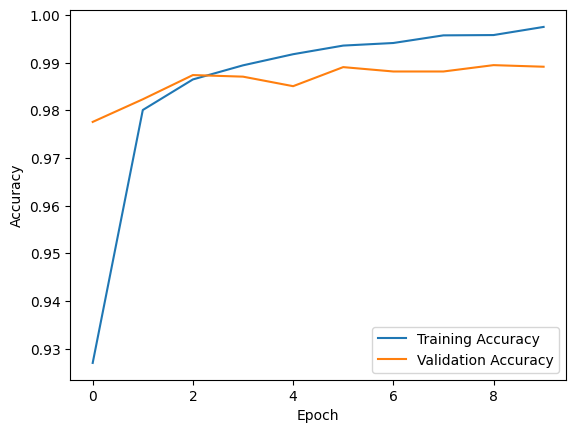

In [13]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label= 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label= 'Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()